In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["legend.loc"] = "upper right"

In [21]:
def generate_data(size, lb, ub, line=None):
    if line is None:
        m = np.random.uniform(2*lb, 2*ub)
        c = np.random.uniform(lb, ub)    
        line = lambda x: m*x + c
    
    X = np.zeros((size, 3))
    Y = np.zeros((size, 1))
        
    for i in range(size):
        x1 = np.random.uniform(lb, ub)
        x2 = np.random.uniform(lb, ub)
            
        X[i] = np.array([1, x1, x2])
        
        if x2>=line(x1): #above the line 1, below the line -1
            Y[i] = 1
        else:
            Y[i] = -1

    selection = np.random.choice(list(range(size)), int(size/10), replace=False)
    Y[selection] = Y[selection]*-1

    return X, Y, line 

In [22]:
def pocket(X_train, Y_train, X_test, Y_test, iters):

    def evaluate_error(X, Y, W):
        samples = len(Y)
        err = 0
        for i in range(samples):
            pred = np.sign(np.dot(W.T, X[i]))
            if pred != Y[i]:
                err+=1
        return err/samples

    W = np.random.random((3,1))
    W_best = np.zeros((3,1))

    E_in, E_in_best, E_out, E_out_best = [1], [1], [1], [1]
    

    for i in range(iters):

        indecies = list(range(len(Y_train)))
        indecies = np.random.choice(indecies, len(indecies), replace=False)
        for ii in indecies:
            x = X_train[ii]
            y = Y_train[ii]
            y_hat = np.dot(W.T, x)
            
            if y*y_hat<=0:
                W = (W.T + y*x).T
                break
            
        train_error = evaluate_error(X_train, Y_train, W)
        test_error = evaluate_error(X_test, Y_test, W)

        E_in.append(train_error)
        if train_error<=E_in_best[-1]:
            E_in_best.append(train_error)
        else:
            E_in_best.append(E_in_best[-1])

        E_out.append(test_error)
        if test_error<=E_out_best[-1]:
            E_out_best.append(test_error)
        else:
            E_out_best.append(E_out_best[-1])
    
    return E_in, E_in_best, E_out, E_out_best, W_best

In [28]:
def plotdata(X, Y, line, lb=-5, ub=5, hypothesis = None):
    plt.ylim(lb, ub)
    plt.xlim(lb, ub)
    plt.xlabel('x1 feature')
    plt.ylabel('x2 feature')
    
    x1 = np.linspace(lb, ub, 100)
    true = line(x1)
    if hypothesis is not None:
        predicted = hypothesis(x1)
        plt.plot(x1, predicted, label='Hypothesis')
    
    plt.plot(x1, true, label='Target Function')
    plt.legend()
    
    for i in range(len(Y)):
        if Y[i]==1:
            marker = 'x'
            plt.scatter(X[i, 1], X[i, 2], color='red', marker='x')
        elif Y[i]==-1:
            plt.scatter(X[i, 1], X[i, 2], color='green', marker='o')
        

In [6]:
lb = -100
ub = 100

In [7]:
X_train, Y_train, l = generate_data(100, lb, ub, line=None)
X_test, Y_test, _ = generate_data(1000, lb, ub, l)


# Train data

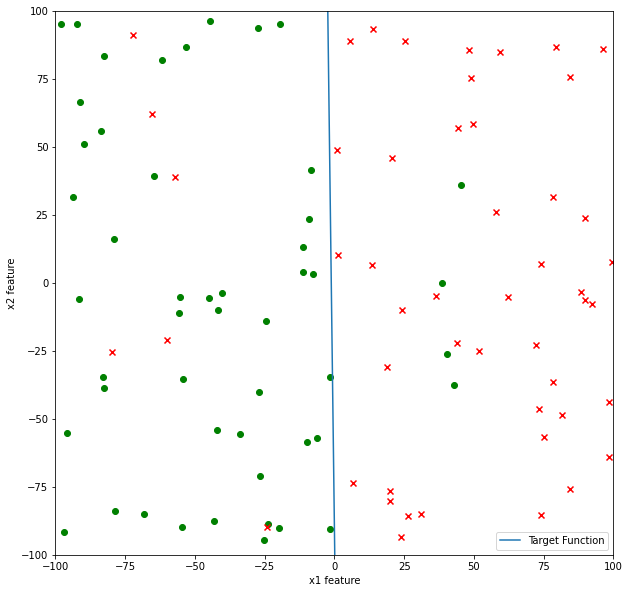

In [8]:
plotdata(X_train, Y_train, l, lb, ub)

# Test data

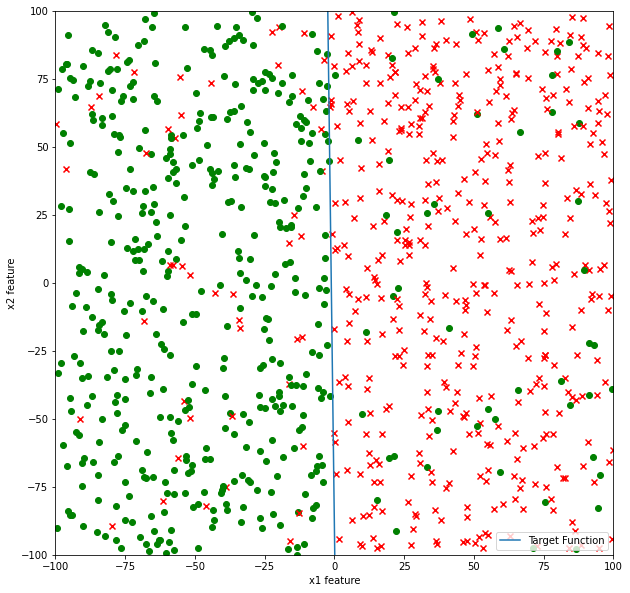

In [9]:
plotdata(X_test, Y_test, l, lb, ub)

# Pocket Algorithm

In [10]:
iters = 1000
experiments = 20 

In [11]:
def divide(arr, ex):
    for i in range(len(arr)):
        arr[i] = arr[i]/ex

In [12]:
[E_in_av, E_in_best_av, E_out_av, E_out_best_av] = [[0 for i in range(iters)] for j in range(4)] 
for i in range(experiments):
    E_in, E_in_best, E_out, E_out_best, W_best = pocket(X_train, Y_train, X_test, Y_test, iters)

    E_in_av = [a + b for a, b in zip(E_in_av, E_in)]
    E_in_best_av = [a + b for a, b in zip(E_in_best_av, E_in_best)]
    E_out_av = [a + b for a, b in zip(E_out_av, E_out)]
    E_out_best_av = [a + b for a, b in zip(E_out_best_av, E_out_best)]

divide(E_in_av, experiments)
divide(E_in_best_av, experiments)
divide(E_out_av, experiments)
divide(E_out_best_av, experiments)

# E_in

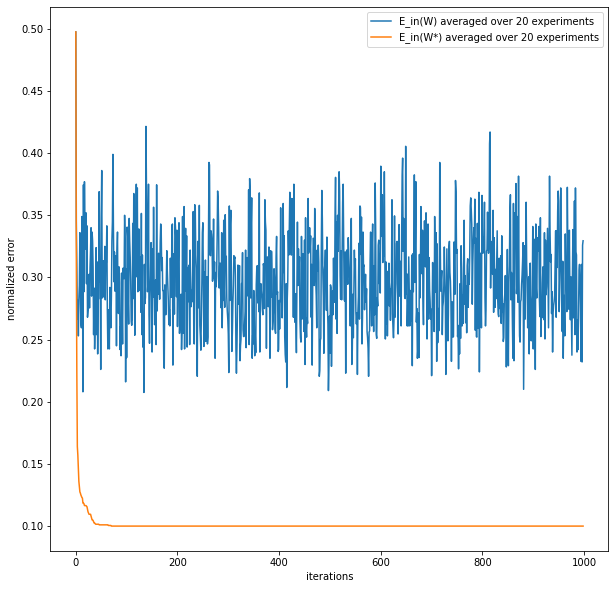

In [25]:
plt.figure(0)
plt.xlabel('iterations')
plt.ylabel('normalized error')

plt.plot(E_in_av[1:], label="E_in(W) averaged over 20 experiments")
plt.plot(E_in_best_av[1:], label = "E_in(W*) averaged over 20 experiments")
plt.legend()

# E_out

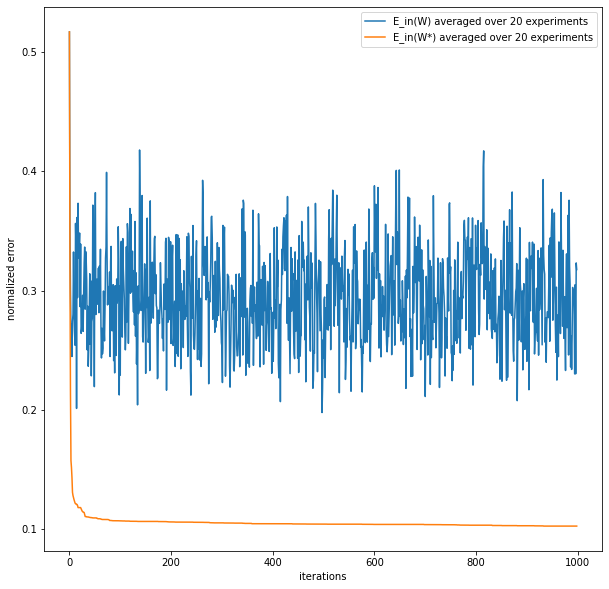

In [31]:
plt.figure(1)
plt.xlabel('iterations')
plt.ylabel('normalized error')

plt.plot(E_out_av[1:], label="E_in(W) averaged over 20 experiments")
plt.plot(E_out_best_av[1:], label = "E_in(W*) averaged over 20 experiments")
plt.legend()